# Spatial Data Programming with Python

*This notebook is intended to solve exercises for Spatial Data Programming with Python by Ben Gurion University of the Negev*

<Axes: >

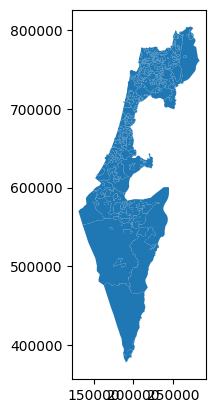

In [17]:
import geopandas as gpd 
towns = gpd.read_file('C:/Users/KASHIF_MD/Downloads/data/muni_il.shp')
towns.plot()

**Comment**

*Note the simple use of path strings instead of the more flexible pathlib package. I've used an absolute path and forward slases. Backward slashes confuse windows as escape character - though they can be made explicit with the help of raw strings or double backward slashes.*

In [6]:
! pip show rasterio

Name: rasterio
Version: 1.4.3
Summary: Fast and direct raster I/O for use with Numpy and SciPy
Home-page: https://github.com/rasterio/rasterio
Author: Sean Gillies
Author-email: sean@mapbox.com
License: BSD
Location: C:\Users\KASHIF_MD\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: affine, attrs, certifi, click, click-plugins, cligj, numpy, pyparsing
Required-by: contextily


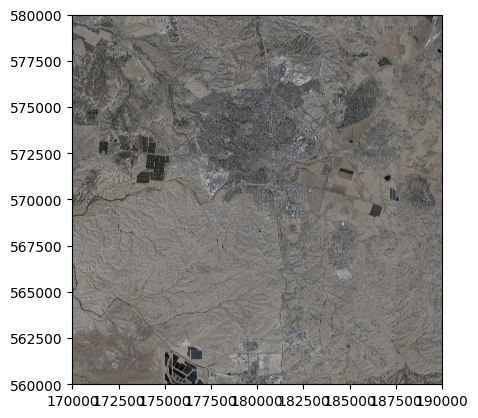

<Axes: >

In [8]:
import rasterio
import rasterio.plot
r = rasterio.open('C:/Users/KASHIF_MD/Downloads/data/BSV_res200-M.tif')
rasterio.plot.show(r)

**Comment**

*Note that I had to again use absolute path. This is because my script and the file I'm reading are at to diferent locations. You may now begin to appreciate Pathlib package. :)*

Exercise 02-a

In [1]:
24 * 60 * 60
# How many seconds are there in a day? 

86400

## F-String

The + operator is perfectly sufficient for the purposes of this book, so we will not elaborate on these methods. However, if you are going to get into text processing using Python, make sure to check them out!

### Ex 02-b

In [4]:
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [5]:
'sun' in days

False

In [6]:
'Sun' in days

True

### Ex 02-c

In [9]:
dict = {'a' : [1, 2], 'b' : [3, 4]}

In [10]:
dict ['b']

[3, 4]

In [28]:
dict ['b'] [ 1]

4

In [12]:
a = 2

In [13]:
type (a)

int

In [14]:
b = 3.14

In [15]:
type (b)

float

In [18]:
a is towns

False

In [19]:
type (a is towns)

bool

In [21]:
str = 'hi kashif'
print (str.title())
type (str)

Hi Kashif


str

In [22]:
tup = 3, 5, 't', 'm'
type (tup)

tuple

In [23]:
type (dict)

dict

### Ex 02-e

In [24]:
person = {
    'name': {'first': 'John', 'last': 'Smith'}, 
    'age': 50, 
    'eyecolor': 'blue', 
    'hobbies': ['Fishing', 'Golf', 'Python programming']
}

In [25]:
person ['eyecolor']

'blue'

In [27]:
person ['name']['last']

'Smith'

In [30]:
person ['name']['first'] + ' ' + person ['name']['last']

'John Smith'

In [32]:
'hobbies' in person

True

In [33]:
'blue' in person

False

In [39]:
'Golf' in person.values()

False

In [1]:
lunch = [
    'Salad', 
    'Salad', 
    'Egg', 
    'Beef', 
    'Potato', 
    'Tea', 
    'Potato', 
    'Potato', 
    'Coffee'
]

In [3]:
lunch_count = {}

In [4]:
for i in lunch:
    if i in lunch_count:
        lunch_count[i] += 1

    else:
        lunch_count [i] = 1

print (lunch_count)

{'Salad': 2, 'Egg': 1, 'Beef': 1, 'Potato': 3, 'Tea': 1, 'Coffee': 1}


*Notice how the dictionary has stores each item name as keys*

In [5]:
import csv

In [15]:
f = open ('C:/Users/KASHIF_MD/Downloads/data/gtfs/stops.txt', 'r', encoding='utf-8-sig')
reader = csv.DictReader (f)

In [16]:
row = next (reader)
print (row)

{'stop_id': '1', 'stop_code': '38831', 'stop_name': "בי''ס בר לב/בן יהודה", 'stop_desc': 'רחוב: בן יהודה 74 עיר: כפר סבא רציף:  קומה: ', 'stop_lat': '32.183985', 'stop_lon': '34.917554', 'location_type': '0', 'parent_station': '', 'zone_id': '38831'}


In [17]:
n = 0

In [18]:
for row in reader:
    n +=1

print (n)

34006


In [19]:
f.close()

### Ex 03-d

In [22]:
f = open ('C:/Users/KASHIF_MD/Downloads/data/gtfs/stops.txt', 'r', encoding='utf-8-sig')
reader = csv.DictReader (f)
row = next (reader)
xmin = float (row['stop_lon'])
xmax = float (row['stop_lon'])
ymin = float (row['stop_lat'])
ymax = float (row['stop_lat'])
for row in reader:
    row ['stop_lon'] = float (row ['stop_lon'])
    row ['stop_lat'] = float (row ['stop_lat'])
    if row ['stop_lon'] < xmin:
        xmin = row ['stop_lon']
    if row['stop_lon'] > xmax:
        xmax = row ['stop_lon']
    if row['stop_lat'] < ymin:
        ymin = row ['stop_lat']
    if row ['stop_lat'] > ymax:
        ymax = row ['stop_lat']

bound = [xmin, ymin, xmax, ymax]
f.close()

print (bound)

[34.284672, 29.492446, 35.839108, 33.283674]


### 03-e

In [26]:
print (list (range (0,32,2)))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


### Ex 03-f

In [27]:
import math 

In [28]:
def circle_area (r):
    return (math.pi * (r**2))

In [30]:
round (circle_area(5), 2)

78.54

### Ex 03-g

In [ ]:
def paste (*args):
    return (

### Ex 03-h

In [31]:
import math
def distance(pnt1, pnt2):
    lon1, lat1 = pnt1
    lon2, lat2 = pnt2
    radius = 6371000
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return (round (d, 2))

In [32]:
distance((0, 0), (1, 0))

111194.93

### Ex 03-i

In [34]:
f = open ('C:/Users/KASHIF_MD/Downloads/data/gtfs/stops.txt', 'r', encoding='utf-8-sig')
reader = csv.DictReader (f)

data = list (reader)

In [35]:
min_row = data [0]

In [36]:
min_value = float (min_row['stop_lat'])

In [39]:
for row in data [1:]:
    current_value = float (row ['stop_lat'])
    if current_value < min_value:
        min_value = current_value
        min_row = row

print (min_row)

{'stop_id': '12510', 'stop_code': '10615', 'stop_name': 'מעבר גבול טאבה', 'stop_desc': 'רחוב: דרך מצרים 168 עיר: אילת רציף:  קומה: ', 'stop_lat': '29.492446', 'stop_lon': '34.904605', 'location_type': '0', 'parent_station': '', 'zone_id': '10615'}


### Ex 03-j

In [60]:
#Initializing an empty dictionary
quadrat = {'NE': 0, 'NW': 0, 'SE': 0, 'SW': 0}

#Reading the file
f = open ('C:/Users/KASHIF_MD/Downloads/data/gtfs/stops.txt', 'r', encoding='utf-8-sig')
reader = csv.DictReader (f)

# Iterate through each column
for row in reader:
    lat = float (row ['stop_lat'])
    lon = float (row ['stop_lon'])

    if (lat > 0 and lon > 0):
        quadrat ['NE'] += 1
    elif (lat > 0 and lon < 0):
        quadrat ['NW'] += 1
    elif (lat < 0 and lon < 0):
        quadrat ['SW'] += 1
    elif (lat < 0 and lon > 0):
        quadrat ['SE'] += 1
f.close()
quadrat

{'NE': 34007, 'NW': 0, 'SE': 0, 'SW': 0}

In [64]:
with open('C:/Users/KASHIF_MD/Downloads/data/gtfs/stops.txt', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        lat = float(row['stop_lat'])
        long = float(row['stop_lon'])

        if long < 0 or lat < 0:  # Check for non-NE quadrant cities
            print(f"Found a city outside NE: {row}")
            break  # Stop after first match